In [1]:
import torch
import numpy as np
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

### Loading dataset

In [2]:
num_workers = 0

batch_size = 64


transform = transforms.ToTensor()


train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)


train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

0.3%

100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



2.0%

100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        
        self.fc2 = nn.Linear(500, 250)
        
        self.fc3=nn.Linear(250,100)
               
        self.fc4 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
       
        x = torch.relu(self.fc2(x))
        
        x= torch.relu(self.fc3(x))
        return F.log_softmax(self.fc4(x), dim=1)

model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)#for regularization add:
                                                        #weight_decay=1e-5
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)


### For training

In [5]:
n_epochs = 15

model.train() # model for training
trainloss_data=[]

for epoch in range(n_epochs):
    
    train_loss = 0.0
    

    for data, target in train_loader:
        
        optimizer.zero_grad()
       
        output = model(data)
        
        #count+=1
        loss = criterion(output, target)
        
        
        loss.backward()
       
        optimizer.step()
        
        train_loss += loss.item()*data.size(0) 
        
    train_loss = train_loss/len(train_loader.dataset)
    
    trainloss_data.append(train_loss)
   
    print('Epoch: {} \tTraining Loss: {:.6f} '.format(epoch+1,train_loss))

Epoch: 1 	Training Loss: 0.308040 
Epoch: 2 	Training Loss: 0.181709 
Epoch: 3 	Training Loss: 0.162660 
Epoch: 4 	Training Loss: 0.152082 
Epoch: 5 	Training Loss: 0.137056 
Epoch: 6 	Training Loss: 0.138126 
Epoch: 7 	Training Loss: 0.115535 
Epoch: 8 	Training Loss: 0.129611 
Epoch: 9 	Training Loss: 0.115225 
Epoch: 10 	Training Loss: 0.114168 
Epoch: 11 	Training Loss: 0.124805 
Epoch: 12 	Training Loss: 0.104027 
Epoch: 13 	Training Loss: 0.104006 
Epoch: 14 	Training Loss: 0.099566 
Epoch: 15 	Training Loss: 0.094724 


Text(0.5, 1.0, 'Loss curve for ReLU activation, without regularization')

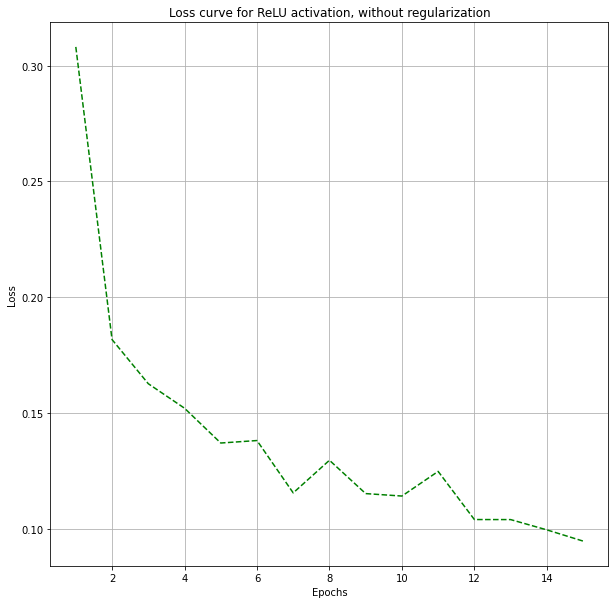

In [6]:
x=np.arange(1,16,1)
plt.figure(figsize=(10, 10))
plt.plot(x,trainloss_data,'--',color='green')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.title("Loss curve for ReLU activation, without regularization")

### For testing

In [7]:
model.eval()
val_loss, correct = 0, 0
for data, target in test_loader:
    output = model(data)
    val_loss += criterion(output, target).data.item()
    pred = output.data.max(1)[1] # get the index of the max log-probability
    correct += pred.eq(target.data).cpu().sum()

val_loss /= len(test_loader)

accuracy = 100. * correct.to(torch.float32) / len(test_loader.dataset)
print("Accuracy: ",accuracy)

Accuracy:  tensor(96.5400)
